In [1]:
from catboost import CatBoostRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from catboost.datasets import titanic

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
installs = pd.read_csv('TP 1er Cuatrimestre 2019/installsConFeatures.csv', low_memory=False, parse_dates = ['created'], index_col=['created'])
installs = installs.sort_index()
installs.head()

,Unnamed: 0,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,...,agentes,top50agentes,top10agentes,kindReducido,top10tipo,top10leng,early_morning,weekend,easter_holiday,nuevoDisositivo
created,,,,,,,,,,,,,,,,,,,,,
2019-04-18 00:00:01.560,94738,70,1,4432995619177048534,False,False,6287817205707153877,0,208,1095,...,0,0,0,1,1,9,0,False,1,1
2019-04-18 00:00:01.851,94737,70,1,5904733559638204455,False,False,6287817205707153877,0,208,1095,...,0,0,0,1,1,9,0,False,1,0
2019-04-18 00:00:05.152,111877,65,1,896373747754111825,False,True,6287817205707153877,6,102,2,...,2,2,1,0,0,8,0,False,1,0
2019-04-18 00:00:05.589,76146,27,0,3399210824535017892,False,False,6287817205707153877,0,190,2,...,21,14,6,1,1,2,0,False,1,1
2019-04-18 00:00:06.795,435184,339,0,1541425881979513687,False,False,6287817205707153877,0,190,2,...,68,46,10,1,1,6,0,False,1,1


In [3]:
installs.drop(['Unnamed: 0'],axis = 1,inplace=True)

In [4]:
installs.head()

,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,...,agentes,top50agentes,top10agentes,kindReducido,top10tipo,top10leng,early_morning,weekend,easter_holiday,nuevoDisositivo
created,,,,,,,,,,,,,,,,,,,,,
2019-04-18 00:00:01.560,70,1,4432995619177048534,False,False,6287817205707153877,0,208,1095,0,...,0,0,0,1,1,9,0,False,1,1
2019-04-18 00:00:01.851,70,1,5904733559638204455,False,False,6287817205707153877,0,208,1095,0,...,0,0,0,1,1,9,0,False,1,0
2019-04-18 00:00:05.152,65,1,896373747754111825,False,True,6287817205707153877,6,102,2,540,...,2,2,1,0,0,8,0,False,1,0
2019-04-18 00:00:05.589,27,0,3399210824535017892,False,False,6287817205707153877,0,190,2,3278,...,21,14,6,1,1,2,0,False,1,1
2019-04-18 00:00:06.795,339,0,1541425881979513687,False,False,6287817205707153877,0,190,2,13419,...,68,46,10,1,1,6,0,False,1,1


In [5]:
"""marcas = list(installs['device_brand'].drop_duplicates())

def categorizarDeviceBrand(x):
    return marcas.index(x) if (x != -1) else x

installs['device_brand'] = installs['device_brand'].fillna(-1).apply(categorizarDeviceBrand)"""

"marcas = list(installs['device_brand'].drop_duplicates())\n\ndef categorizarDeviceBrand(x):\n    return marcas.index(x) if (x != -1) else x\n\ninstalls['device_brand'] = installs['device_brand'].fillna(-1).apply(categorizarDeviceBrand)"

In [6]:
"""device_model = list(installs['device_model'].drop_duplicates())

def categorizarDeviceModel(x):
    return device_model.index(x) if (x != -1) else x

installs['device_model'] = installs['device_model'].fillna(-1).apply(categorizarDeviceModel)"""

"device_model = list(installs['device_model'].drop_duplicates())\n\ndef categorizarDeviceModel(x):\n    return device_model.index(x) if (x != -1) else x\n\ninstalls['device_model'] = installs['device_model'].fillna(-1).apply(categorizarDeviceModel)"

In [7]:
"""device_language = list(installs['device_language'].drop_duplicates())

def categorizarDeviceLanguage(x):
    return device_language.index(x) if (x != -1) else x

installs['device_language'] = installs['device_language'].fillna(-1).apply(categorizarDeviceLanguage)
installs.describe()"""

"device_language = list(installs['device_language'].drop_duplicates())\n\ndef categorizarDeviceLanguage(x):\n    return device_language.index(x) if (x != -1) else x\n\ninstalls['device_language'] = installs['device_language'].fillna(-1).apply(categorizarDeviceLanguage)\ninstalls.describe()"

In [8]:
info1 = installs['2019-04-21':'2019-04-23'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info1['created'] = info1['created'] - pd.Timestamp('2019-04-21 00:00:00')
info1['created'] = info1['created'].transform(lambda x: x.total_seconds())
info1 = info1.reset_index()
info1 = info1.merge(installs['2019-04-18':'2019-04-20'].reset_index(),on="ref_hash", how="right")
info1 = info1.rename(columns={'created_x':'label','created_y':'created'})

label1 = info1['label'].to_frame()
train1 = info1.drop('label', axis=1)

In [9]:
info2 = installs['2019-04-22':'2019-04-24'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info2['created'] = info2['created'] - pd.Timestamp('2019-04-22 00:00:00')
info2['created'] = info2['created'].transform(lambda x: x.total_seconds())
info2 = info2.reset_index()
info2 = info2.merge(installs['2019-04-19':'2019-04-21'].reset_index(),on="ref_hash", how="right")
info2 = info2.rename(columns={'created_x':'label','created_y':'created'})

label2 = info2['label'].to_frame()
train2 = info2.drop('label', axis=1)

In [10]:
info3 = installs['2019-04-23':'2019-04-25'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info3['created'] = info3['created'] - pd.Timestamp('2019-04-23 00:00:00')
info3['created'] = info3['created'].transform(lambda x: x.total_seconds())
info3 = info3.reset_index()
info3 = info3.merge(installs['2019-04-20':'2019-04-22'].reset_index(),on="ref_hash", how="right")
info3 = info3.rename(columns={'created_x':'label','created_y':'created'})

label3 = info3['label'].to_frame()
train3 = info3.drop('label', axis=1)

In [11]:
info4 = installs['2019-04-24':'2019-04-26'].reset_index().groupby('ref_hash').agg({'created' : 'min'})
info4['created'] = info4['created'] - pd.Timestamp('2019-04-24 00:00:00')
info4['created'] = info4['created'].transform(lambda x: x.total_seconds())
info4 = info4.reset_index()
info4 = info4.merge(installs['2019-04-21':'2019-04-23'].reset_index(),on="ref_hash", how="right")
info4 = info4.rename(columns={'created_x':'label','created_y':'created'})

label4 = info4['label'].to_frame()
train4 = info4.drop('label', axis=1)


In [12]:
train1 = train1.dropna()
train2 = train2.dropna()
train3 = train3.dropna()
train4 = train4.dropna()
label1 = label1.fillna(3*24*60*60)
label2 = label2.fillna(3*24*60*60)
label3 = label3.fillna(3*24*60*60)
label4 = label4.fillna(3*24*60*60)

# Agrego unos features mas

In [13]:
train1['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-18 00:00:00')).transform(lambda x: x.total_seconds())
train2['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-19 00:00:00')).transform(lambda x: x.total_seconds())
train3['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-20 00:00:00')).transform(lambda x: x.total_seconds())
train4['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-21 00:00:00')).transform(lambda x: x.total_seconds())

In [14]:
train1['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train1))
train2['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train2))
train3['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train3))
train4['accionesDesdeQueComenzoLaVentana'] = np.arange(len(train4))

In [15]:
train1.drop(['created'],axis =1, inplace = True )
train2.drop(['created'],axis =1, inplace = True )
train3.drop(['created'],axis =1, inplace = True )
train4.drop(['created'],axis =1, inplace = True )

In [16]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160861 entries, 0 to 160860
Data columns (total 35 columns):
ref_hash                            160861 non-null int64
application_id                      160861 non-null int64
ref_type                            160861 non-null int64
attributed                          160861 non-null bool
implicit                            160861 non-null bool
device_countrycode                  160861 non-null int64
device_brand                        160861 non-null int64
device_model                        160861 non-null int64
session_user_agent                  160861 non-null int64
user_agent                          160861 non-null int64
kind                                160861 non-null int64
wifi                                160861 non-null bool
ip_address                          160861 non-null int64
device_language                     160861 non-null int64
TopApp/Otro                         160861 non-null int64
dia                   

In [17]:
train1.columns

Index(['ref_hash', 'application_id', 'ref_type', 'attributed', 'implicit',
       'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'kind', 'wifi', 'ip_address',
       'device_language', 'TopApp/Otro', 'dia', 'hora', 'minuto',
       'diaDeLaSemana', 'top10apps', 'top50marcas', 'top10marcas',
       'top10marcasSinNan', 'agentes', 'top50agentes', 'top10agentes',
       'kindReducido', 'top10tipo', 'top10leng', 'early_morning', 'weekend',
       'easter_holiday', 'nuevoDisositivo', 'tiempoDesdeComienzoDeVentana',
       'accionesDesdeQueComenzoLaVentana'],
      dtype='object')

In [18]:
features = ['ref_hash']#, 'application_id', 'ref_type', 'attributed', 'implicit',
       #'device_countrycode', 'device_brand', 'device_model',
       #'session_user_agent', 'user_agent', 'kind', 'wifi', 'ip_address',
       #'device_language', 'TopApp/Otro', 'dia', 'hora', 'minuto',
       #'diaDeLaSemana', 'top10apps', 'top50marcas', 'top10marcas',
       #'top10marcasSinNan', 'agentes', 'top50agentes', 'top10agentes',
       #'kindReducido', 'top10tipo', 'top10leng', 'early_morning', 'weekend',
       #'easter_holiday', 'nuevoDisositivo', 'tiempoDesdeComienzoDeVentana',
       #'accionesDesdeQueComenzoLaVentana']

In [21]:
#def fit_transform_ohe(df,col_name):
"""This function performs one hot encoding for the specified
column.
    Args:
        df(pandas.DataFrame): the data frame containing the mentioned column name
        col_name: the column to be one hot encoded
    Returns:
        tuple: label_encoder, one_hot_encoder, transformed column as pandas Series
    """
    # label encode the column
'''    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

installs = fit_transform_one(installs,)'''

"    le = preprocessing.LabelEncoder()\n    le_labels = le.fit_transform(df[col_name])\n    df[col_name+'_label'] = le_labels\n    # one hot encoding\n    ohe = preprocessing.OneHotEncoder()\n    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()\n    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]\n    features_df = pd.DataFrame(feature_arr, columns=feature_labels)\n    return le,ohe,features_df\n\ninstalls = fit_transform_one(installs,)"

# Analisis

## Entreno

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 
regression_model.fit(train1,label1)
predicted = regression_model.predict(train1)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label1['label']-predicted[0])**2)/len(label1)))
RMSE

8371.285337675163

### Veo con que min_sample_leaf conviene

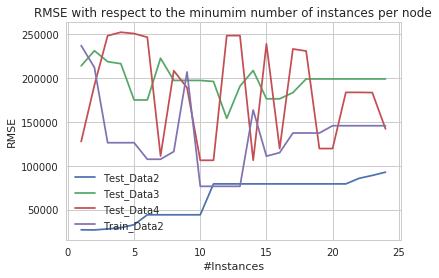

In [24]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test2 = []
RMSE_test3 = []
RMSE_test4 = []
for i in range(1,25):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(train1,label1)
    #Predict query instances
    predicted_train = regression_model.predict(train1)
    predicted_test2 = regression_model.predict(train2)
    predicted_test3 = regression_model.predict(train3)
    predicted_test4 = regression_model.predict(train4)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((label1['label']-predicted_train[0])**2)/len(label1['label']))))
    RMSE_test2.append(np.sqrt(np.sum(((label2['label']-predicted_test2[0])**2)/len(label2['label']))))
    RMSE_test3.append(np.sqrt(np.sum(((label3['label']-predicted_test3[0])**2)/len(label3['label']))))
    RMSE_test4.append(np.sqrt(np.sum(((label4['label']-predicted_test4[0])**2)/len(label4['label']))))
   
ax0.plot(range(1,25),RMSE_test2,label='Test_Data2')
ax0.plot(range(1,25),RMSE_test3,label='Test_Data3')
ax0.plot(range(1,25),RMSE_test4,label='Test_Data4')
ax0.plot(range(1,25),RMSE_train,label='Train_Data2')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

## Otra forma de ver parametros

In [ ]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
'''fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,50):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(train1,label1)
    #Predict query instances
    predicted_train = regression_model.predict(train1)
    predicted_test = regression_model.predict(train4)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((label1['label']-predicted_train[0])**2)/len(label1['label']))))
    RMSE_test.append(np.sqrt(np.sum(((label4['label']-predicted_test[0])**2)/len(label4['label']))))'''

In [ ]:
'''ax0.plot(range(1,50),RMSE_test,label='Test_Data')
ax0.plot(range(1,50),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()'''

### Elijo min_sample_leaf de 14, parece que en todos da un resultado relativamente bueno.

In [25]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=14) 
regression_model.fit(train1,label1)
predicted = regression_model.predict(train1)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label1['label']-predicted[0])**2)/len(label1)))
RMSE

11345.60874303161

### Hago otras pruebas

In [ ]:
predicted = regression_model.predict(train2)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label2['label']-predicted[0])**2)/len(label2)))
RMSE

In [ ]:
predicted = regression_model.predict(train3)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label3['label']-predicted[0])**2)/len(label3)))
RMSE

In [ ]:
predicted = regression_model.predict(train4)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label4['label']-predicted[0])**2)/len(label4)))
RMSE

## Predigo

In [ ]:
ultimo = installs['2019-04-24':'2019-04-26'].reset_index()

In [ ]:
ultimo = ultimo.dropna()
ultimo.drop(['created'],axis =1, inplace = True )
ultimo['tiempoDesdeComienzoDeVentana'] = (installs.reset_index()['created'] - pd.Timestamp('2019-04-24 00:00:00')).transform(lambda x: x.total_seconds())
ultimo['accionesDesdeQueComenzoLaVentana'] = np.arange(len(ultimo))


In [ ]:
predicted = regression_model.predict(ultimo)

In [ ]:
preds = pd.DataFrame(predicted)
preds

In [ ]:
preds.max()

### Verifico que el maximo sea 3 * 24 * 60 * 60

In [ ]:
preds[0] = preds[0].transform(lambda x: min(x, 3*24*60*60))

In [ ]:
preds.max()

# Que pasa si usamos todos los datos a la vez?

In [45]:
train = train1.append(train2)
train = train.append(train3)
#train = train.append(train4)
train.head()

,ref_hash,application_id,ref_type,implicit,device_model,user_agent,ip_address,TopApp/Otro,dia,hora,minuto,diaDeLaSemana,top10apps,top50marcas,top50agentes,nuevoDisositivo,tiempoDesdeComienzoDeVentana,accionesDesdeQueComenzoLaVentana
0,2493454867357963,158,1,False,120,0,8426419977387901158,0,20,22,22,5,0,0,0,0,1.56,0
1,3589607969461633,77,1,False,70,0,1036806782641860771,0,18,14,57,3,0,0,0,1,1.85,1
2,3589607969461633,302,1,False,70,68,1036806782641860771,0,18,16,16,3,0,6,2,0,5.15,2
3,3861795021724487,339,0,False,190,13403,8499290145871692375,0,20,18,13,5,0,0,46,1,5.59,3
4,6455321535851721,94,1,False,74,0,4458082048655699359,0,19,3,30,4,0,0,0,0,6.80,4


In [46]:
label = label1.append(label2)
label = label.append(label3)
#label = label.append(label4)
label.head()

,label
0,"19,452.72"
1,"108,671.33"
2,"108,671.33"
3,"252,890.11"
4,"217,290.61"


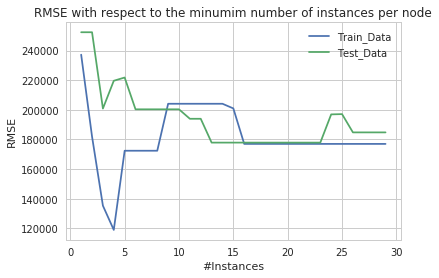

In [47]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 
fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
for i in range(1,30):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(train,label)
    #Predict query instances
    predicted_train = regression_model.predict(train)
    predicted_test = regression_model.predict(train4)
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((label['label']-predicted_train[0])**2)/len(label['label']))))
    RMSE_test.append(np.sqrt(np.sum(((label4['label']-predicted_test[0])**2)/len(label4['label']))))
   
ax0.plot(range(1,30),RMSE_train,label='Train_Data')
ax0.plot(range(1,30),RMSE_test,label='Test_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

### Elijo min_sample_leaf de 25, parece que en todos da un resultado relativamente bueno.

In [ ]:
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=30) 
regression_model.fit(train,label)
predicted = regression_model.predict(train1)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label1['label']-predicted[0])**2)/len(label1)))
RMSE

### Hago otras pruebas

In [ ]:
predicted = regression_model.predict(train2)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label2['label']-predicted[0])**2)/len(label2)))
RMSE

In [ ]:
predicted = regression_model.predict(train3)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label3['label']-predicted[0])**2)/len(label3)))
RMSE

In [ ]:
predicted = regression_model.predict(train4)
predicted = pd.DataFrame(predicted)
RMSE = np.sqrt(np.sum(((label4['label']-predicted[0])**2)/len(label4)))
RMSE

## Es otra opcion

## Predigo

In [ ]:
ultimo2 = installs['2019-04-24':'2019-04-26'].reset_index()

In [ ]:
ultimo2 = ultimo2.dropna()
ultimo2.drop(['created'],axis =1, inplace = True )

In [ ]:
predicted = regression_model.predict(ultimo2)

In [ ]:
preds2 = pd.DataFrame(predicted)
preds2

In [ ]:
preds2.max()

### Verifico que el maximo sea 3 * 24 * 60 * 60

In [ ]:
preds2[0] = preds2[0].transform(lambda x: min(x, 3*24*60*60))

In [ ]:
preds2.max()

# Targets

# 1er posible target

In [ ]:
target = pd.read_csv('TP 1er Cuatrimestre 2019/target_competencia_ids.csv', low_memory=False)


In [ ]:
ultimo['label']=preds
ultimo['sc'] = ultimo['ref_hash'].transform(lambda x: str(x)+'_sc')
mergeados = ultimo.merge(target, left_on = 'sc',right_on='ref_hash', how='inner')

In [ ]:
mergeados = mergeados[['ref_hash_y','label']]
mergeados

In [ ]:
mergeados = mergeados.fillna(3*24*60*60)

# 2do posible target

In [ ]:
ultimo2['label']=preds
ultimo2['sc'] = ultimo2['ref_hash'].transform(lambda x: str(x)+'_sc')
mergeados2 = ultimo2.merge(target, left_on = 'sc',right_on='ref_hash', how='inner')

In [ ]:
mergeados2 = mergeados2[['ref_hash_y','label']]
mergeados2

In [ ]:
mergeados2 = mergeados2.fillna(3*24*60*60)